In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression #using sklearn

In [2]:
df = pd.read_csv('udemy_data/1.01. Simple linear regression.csv')

In [3]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


<b>Define Dependent and Independent Data</b>

In [4]:
x = df['SAT']
y = df['GPA'] 

In [5]:
x.shape

(84,)

In [6]:
#sklearn need array 2 dimension in in that case our array is single dimension
x_matrix = x.values.reshape(-1,1) #-1 mean till the last of data, 1 mean 1 dimension
x_matrix.shape

(84, 1)

<b>Regression</b>

In [19]:
reg = LinearRegression(normalize=True) #make sklean model

In [20]:
reg.fit(x_matrix,y) #train the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

<b>R-Square</b>

In [21]:
reg.score(x_matrix,y)

0.40600391479679765

<b>Coefficients</b>
<br>for every dependent variable

In [22]:
reg.coef_

array([0.00165569])

<b>Intercept</b><br>
Mean as b0, first single value

In [23]:
reg.intercept_

0.2750402996602803

<b>Predict Value</b>

In [24]:
new_data = pd.DataFrame(data=[1740,1800],columns=['SAT'])
new_data

,SAT
0,1740
1,1800


In [25]:
reg.predict(new_data) #predict the new data

array([3.15593751, 3.25527879])

In [26]:
new_data['GPA'] = reg.predict(new_data)
new_data

,SAT,GPA
0,1740,3.155938
1,1800,3.255279


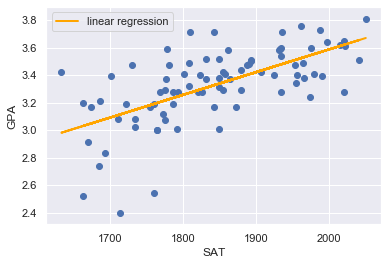

In [27]:
plt.scatter(x,y)
yhat = reg.intercept_+ reg.coef_*x_matrix #get the line
plt.plot(x, yhat, lw=2, c='orange', label='linear regression')
plt.legend()
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

<h3>Real Case</h3>
<br>Predict the house price based on the area

In [29]:
df2 = pd.read_csv('udemy_data/real_estate_price_size.csv')
df2.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [30]:
y = df2['price']
x = df2['size']

In [35]:
reg = LinearRegression(normalize=True)

In [36]:
x = x.values.reshape(-1,1)

In [37]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [39]:
#R_score
reg.score(x,y)

0.7447391865847586

In [40]:
#intercept
reg.intercept_

101912.60180122903

In [41]:
#coef
reg.coef_

array([223.17874259])

In [58]:
pred_data = pd.DataFrame(data=[1000,2000,850],columns=['Size'])
pred_data.shape

(3, 1)

In [59]:
reg.predict(pred_data)

array([325091.34439584, 548270.08699044, 291614.53300665])

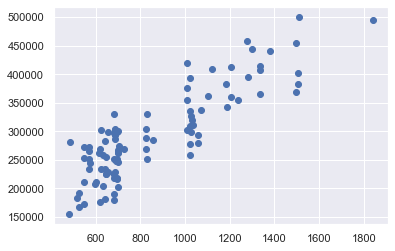

In [60]:
plt.scatter(x,y)

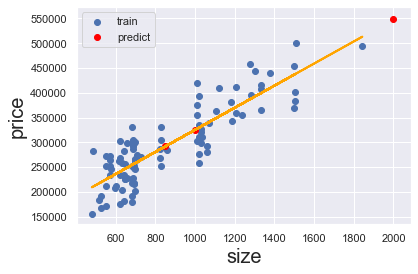

In [61]:
plt.scatter(x,y, label='train')
plt.scatter(pred_data, reg.predict(pred_data), c='red', label = 'predict') #scatter plot for the predict data
yhat = reg.intercept_ + x * reg.coef_ #get the model line
plt.plot(x,yhat, c='orange', lw=2)
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.legend()
plt.show()